In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '6'
sys.path.insert(0,'..')

import torch
import torch.nn as nn
import torch.nn.functional as F

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission
from neural_methods import impute_by_DMF

data_dir = '../../data/'

In [3]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.2)

Using: cuda
Train RMSE: 0.9531, Test RMSE: 0.9865


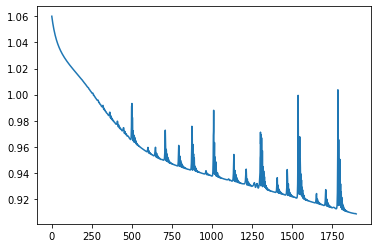

In [4]:

reg = 15
dim_embed = 13
prediction, loss_monitor = impute_by_DMF(train_matrix, is_train, iters=2000, dim_embed=dim_embed, reg_user=reg, reg_item=reg, lr=1e-4)
train_rmse, test_rmse = eval_prediction(prediction, train_matrix, is_train), eval_prediction(prediction, test_matrix, is_test)
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
plt.plot(loss_monitor[100:])
plt.show()

Using: cuda
Train RMSE: 0.9616, Test RMSE: 0.9637


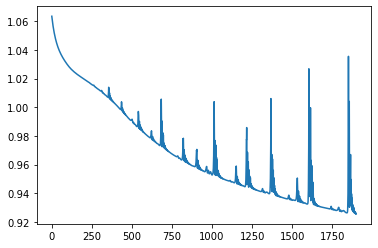

In [5]:
reg = 15
dim_embed = 13
data_matrix, is_provided = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=None)
prediction, loss_monitor = impute_by_DMF(data_matrix, is_provided, iters=2000, dim_embed=dim_embed, reg_user=reg, reg_item=reg, lr=1e-4)
train_rmse, test_rmse = eval_prediction(prediction, train_matrix, is_train), eval_prediction(prediction, test_matrix, is_test)
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
plt.plot(loss_monitor[100:])
plt.show()

In [6]:

store_dense_matrix_to_submission(os.path.join(data_dir, 'sampleSubmission.csv'), os.path.join(data_dir, 'mysub.csv'), prediction)


Loading requests specified by submission samples...
Storing 1176952 records for submission as requested...
